In [4]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('../sakktabla.jpg', cv.IMREAD_GRAYSCALE) # `<opencv_root>/samples/data/blox.jpg`

# Initiate FAST object with default values
fast = cv.FastFeatureDetector_create()

# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv.drawKeypoints(img, kp, None, color=(255,0,0))

# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )

cv.imwrite('fast_true.png', img2)

pts = np.array([k.pt for k in kp], dtype=np.float32)  # shape: (N,2)


# Disable nonmaxSuppression
#fast.setNonmaxSuppression(0)
#kp = fast.detect(img, None)

#print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )

#img3 = cv.drawKeypoints(img, kp, None, color=(255,0,0))

#cv.imwrite('fast_false.png', img3)

Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 1851


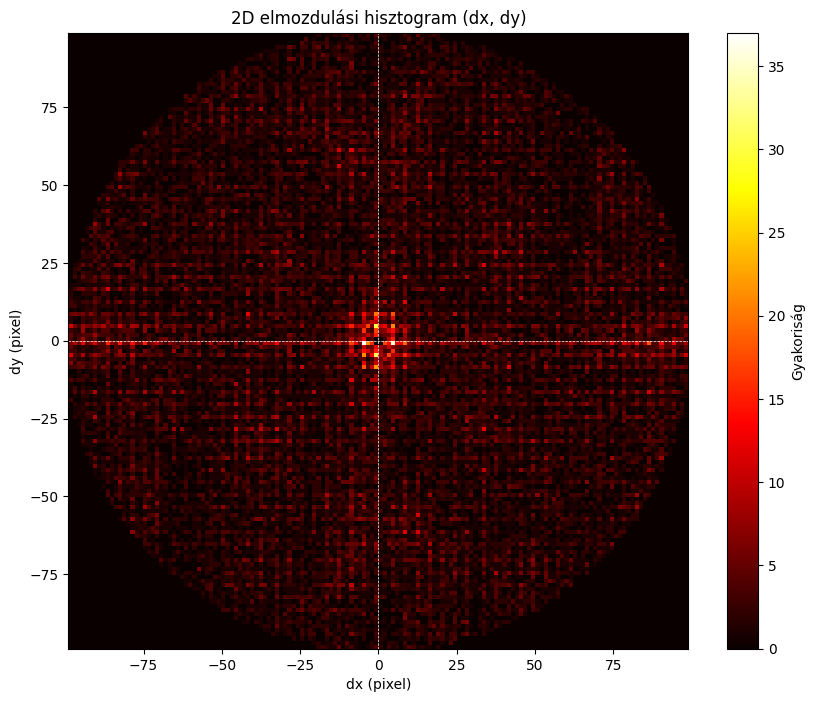

In [5]:
def plot_displacement_histogram(points_xy: np.ndarray, max_dist=100.0, bins=150, sample=None):
    """
    2D hisztogram a pontpárok elmozdulásvektorairól (dx, dy).
    points_xy: (N,2) float32/float64, (x,y)
    sample: ha nem None, akkor ennyi pontot véletlen mintavételez (gyorsítás)
    """
    if points_xy is None or len(points_xy) < 2:
        print("Nincs elég pont a hisztogramhoz.")
        return None, None, None

    pts = points_xy

    # Opcionális gyorsítás: ha sok pont van, mintavételezz
    if sample is not None and len(pts) > sample:
        idx = np.random.choice(len(pts), size=sample, replace=False)
        pts = pts[idx]

    dxs = []
    dys = []

    for i in range(len(pts)):
        diffs = pts - pts[i]  # (N,2)

        dist = np.linalg.norm(diffs, axis=1)
        mask = (dist < max_dist) & (dist > 1e-6)  # önmaga kizárása

        filtered = diffs[mask]
        if len(filtered) > 0:
            dxs.extend(filtered[:, 0])
            dys.extend(filtered[:, 1])

    if len(dxs) == 0:
        print("A max_dist túl kicsi vagy a pontok túl ritkák: nincs adat a hisztogramhoz.")
        return None, None, None

    plt.figure(figsize=(10, 8))
    h, xedges, yedges, im = plt.hist2d(dxs, dys, bins=bins, cmap='hot')
    plt.colorbar(label='Gyakoriság')
    plt.title('2D elmozdulási hisztogram (dx, dy)')
    plt.xlabel('dx (pixel)')
    plt.ylabel('dy (pixel)')
    plt.axhline(0, color='white', lw=0.5, ls='--')
    plt.axvline(0, color='white', lw=0.5, ls='--')
    plt.show()

    return h, xedges, yedges

h, x_edges, y_edges = plot_displacement_histogram(pts, max_dist=100, bins=150, sample=800)